In [1]:
# For credit card detection data, we will be running an ML Model with following approaches and evaluate them to decide the best approach

# Keep data as is
# Balance the data through Oversampling of minority class
# Balance the data through Undersampling of majority class
# Synthesize new minority Class

In [2]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV

#For Model Evaluation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,f1_score,classification_report,recall_score
from sklearn.preprocessing import label_binarize

In [3]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
def know_my_data(data, target_col):
    print("Data's rows and columns:", data.shape )
    print("Data types of each column", data.dtypes)
    print("Target variable's distribution", data[target_col].value_counts())
    sns.countplot(target_col, data=data)
    print("Target variable's normalized counts", data[target_col].value_counts(normalize= True))
    print("Data summary statistics", data.describe())
    x = data.skew()
    skew_cols = (x.sort_values(ascending = False).to_frame().rename(columns = {0:'Skew'}).query('abs(Skew) > {}'.format(0.75)))
    print("Columns with skew > 0.75", skew_cols)
    print("Columns with missing values:", df.isnull().sum().to_frame().rename(columns = {0: 'Missing_Values'}).query('abs(Missing_Values) > {}'.format(0)))
    x = df.corr().abs()
    x = x.drop(columns = [target_col])
    x = x.where(np.triu(np.ones(x.shape), k=1).astype(np.bool))
    x
    high_corr_features = [column for column in x.columns if any(x[column] > 0.90)]
    print("High Correlated Features above 90%:", high_corr_features )

Data's rows and columns: (284807, 31)
Data types of each column Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Target variable's distribution 0    284315
1       492
Name: Class, dtype: int64
Target variable's normalized counts 0    0.998273
1    0.001727
Name: Class, dtype: float64


C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Data summary statistics                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+0

C:\Users\derek\AppData\Local\Temp/ipykernel_18192/2110851179.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.where(np.triu(np.ones(x.shape), k=1).astype(np.bool))


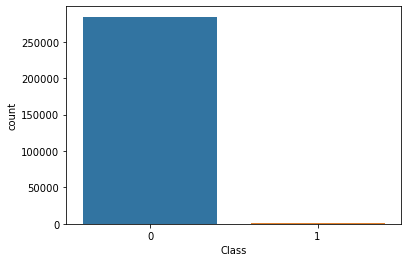

In [5]:
target_col = 'Class'
know_my_data(df, target_col)

In [6]:
# Major Findings from EDA and Feature Engineering Steps:
# We don't have any missing values that needs to be imputed
# There are features present in data with skew that shall be normalized for better prediction through non tree models
# Dimensionality Reduction
# Outliers Removal
# We don't have high correlated features so no need to remove any of them

<AxesSubplot:>

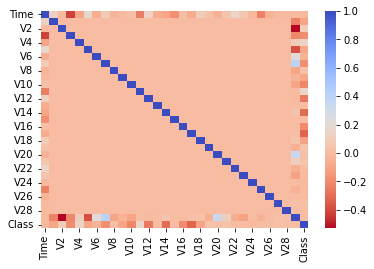

In [7]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [8]:
#Top Five Features
x = corr['Class'].abs().sort_values(ascending = False).to_frame().query('Class < 1')
x.iloc[0:5]

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539


C:\Users\derek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\derek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\derek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='V16', ylabel='Density'>

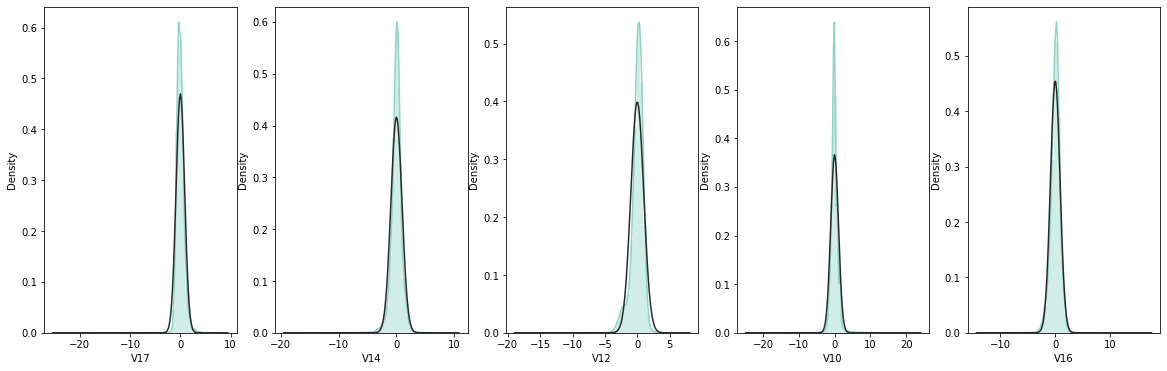

In [9]:
from scipy.stats import norm

sns.set_palette("Set3")
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 6))
sns.distplot(df['V17'],ax=ax1, fit=norm)
sns.distplot(df['V14'],ax=ax2, fit=norm)
sns.distplot(df['V12'],ax=ax3, fit=norm)
sns.distplot(df['V10'],ax=ax4, fit=norm)
sns.distplot(df['V16'],ax=ax5, fit=norm)

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\derek\anaconda3\lib\si

<AxesSubplot:xlabel='V16'>

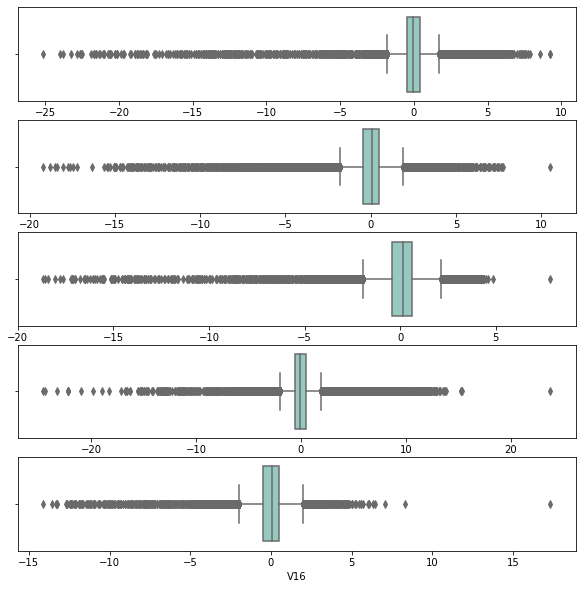

In [10]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10, 10))
sns.boxplot(df['V17'],ax=ax1)
sns.boxplot(df['V14'],ax=ax2)
sns.boxplot(df['V12'],ax=ax3)
sns.boxplot(df['V10'],ax=ax4)
sns.boxplot(df['V16'],ax=ax5)

In [11]:
# OUTLIERS CAPPING

In [12]:
features = ['V17','V14','V12','V16','V10']
new_df_cap = df.copy()


for cols in features:
    upper_limit = new_df_cap[features].mean() + 3*new_df_cap[features].std()
    lower_limit = new_df_cap[features].mean() - 3*new_df_cap[features].std()
    new_df_cap[new_df_cap[features] > upper_limit]
    new_df_cap[new_df_cap[features] < lower_limit]
    new_df_cap[features] = np.where(
        new_df_cap[features] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[features] < lower_limit,
            lower_limit,
            new_df_cap[features]
        )
    )

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\derek\anaconda3\lib\si

<AxesSubplot:xlabel='V16'>

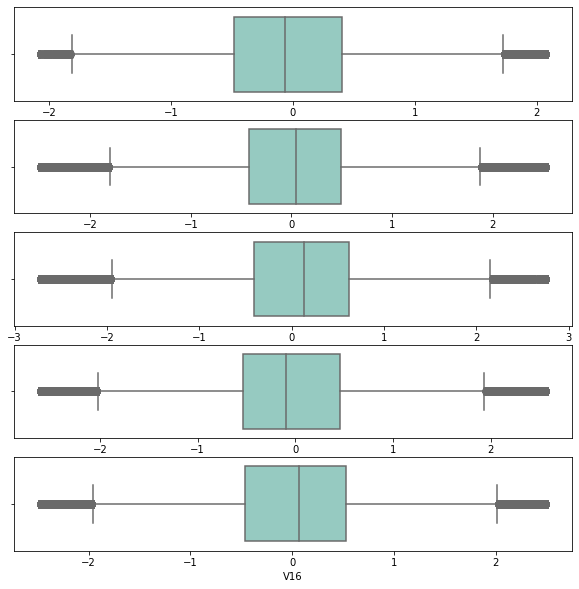

In [13]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10, 10))
sns.boxplot(new_df_cap['V17'],ax=ax1)
sns.boxplot(new_df_cap['V14'],ax=ax2)
sns.boxplot(new_df_cap['V12'],ax=ax3)
sns.boxplot(new_df_cap['V10'],ax=ax4)
sns.boxplot(new_df_cap['V16'],ax=ax5)

### APPROACH 1: RUN ML MODEL WITHOUT MAKING ANY CHANGES TO IMPACT IMBALANCE OF DATA

In [14]:
X = new_df_cap.drop(columns = ['Class'])
y = new_df_cap['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


In [15]:
unique, counts = np.unique(y_train, return_counts=True)
unique2, counts2 = np.unique(y_test, return_counts=True)

print("y_train value counts",np.asarray((unique, counts)).T)
print("y_test value counts",np.asarray((unique2, counts2)).T)

y_train value counts [[     0 227451]
 [     1    394]]
y_test value counts [[    0 56864]
 [    1    98]]


In [16]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
knn = KNeighborsClassifier( weights='distance').fit(X_train, y_train)
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_train, y_train)

y_pred = list()
y_prob = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr, knn, RF]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

C:\Users\derek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,logistics_regression,knn,random_forest
0,1,0,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [17]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,logistics_regression,knn,random_forest
precision,0.998755,0.998405,0.999609
recall,0.998894,0.998402,0.999614
fscore,0.998757,0.997711,0.999592
accuracy,0.998894,0.998402,0.999614
auc,0.739690,0.535714,0.892848


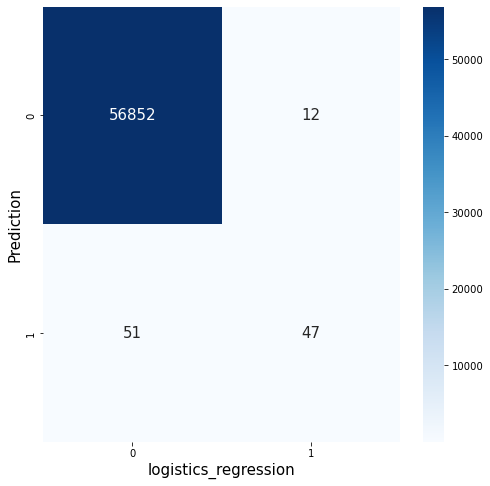

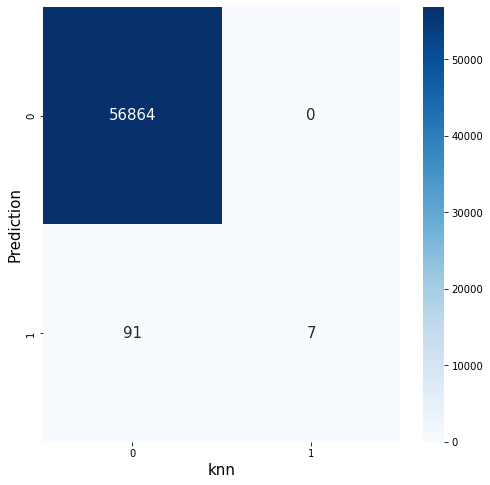

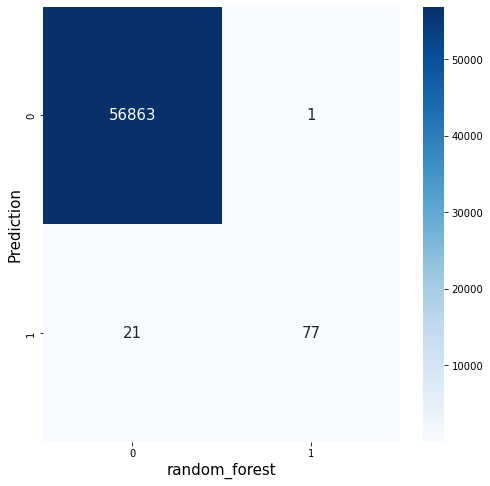

In [18]:
for cols in y_pred.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #labels = [0, 'True']
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

In [19]:
# Even though the precision and recall values look great,
# LR could correctly detect 47 frauds out of 98, KNN 7 and random forest 77.

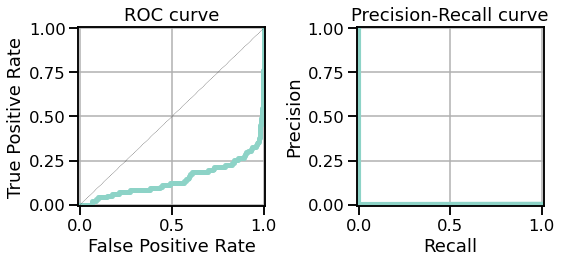

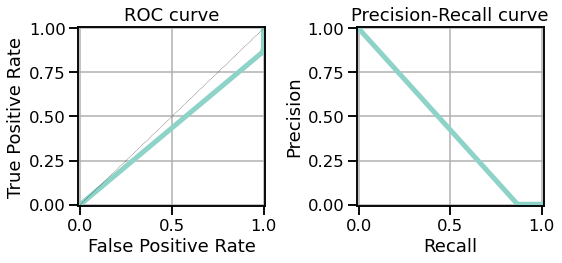

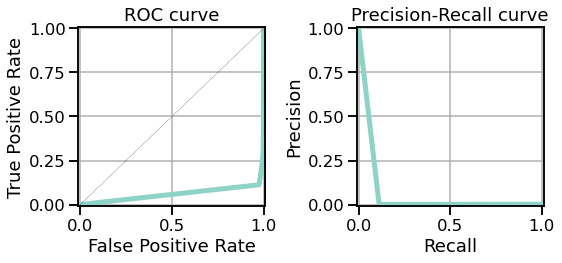

In [20]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

for cols in y_pred.columns:
    sns.set_context('talk')

    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(8, 4)
    ax = axList[0]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[cols])
    ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve')
    ax.grid(True)

# Plot the precision-recall curve
    ax = axList[1]

    precision, recall, _ = precision_recall_curve(y_test, y_prob[cols])
    ax.plot(recall, precision, linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
    ax.grid(True)

    plt.tight_layout()

### Balance the data through Oversampling of minority class

In [21]:
# This can be done through RandomOverSampler.
# I will increase the data where the fraud cases will be over sampled.
# However we need to do this only on the training set. the test set needs to be the same for comparison purpose

In [22]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % (y_over.value_counts()))

Resampled dataset shape 0    227451
1    227451
Name: Class, dtype: int64


In [23]:
y_test.value_counts() # we keep it as is

0    56864
1       98
Name: Class, dtype: int64

In [24]:
lr_over = LogisticRegression(solver='liblinear').fit(X_over, y_over)
knn_over = KNeighborsClassifier( weights='distance').fit(X_over, y_over)
RF_over = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_over, y_over)

C:\Users\derek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
y_pred_over = list()
y_prob_over = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_over, knn_over, RF_over]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_over.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_over.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_over = pd.concat(y_pred_over, axis=1)
y_prob_over = pd.concat(y_prob_over, axis=1)

In [26]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred_over[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_over[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred_over[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred_over[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,logistics_regression,knn,random_forest
precision,0.998202,0.997105,0.999592
recall,0.969787,0.997016,0.999596
fscore,0.983105,0.997060,0.999572
accuracy,0.969787,0.997016,0.999596
auc,0.939028,0.580859,0.887746


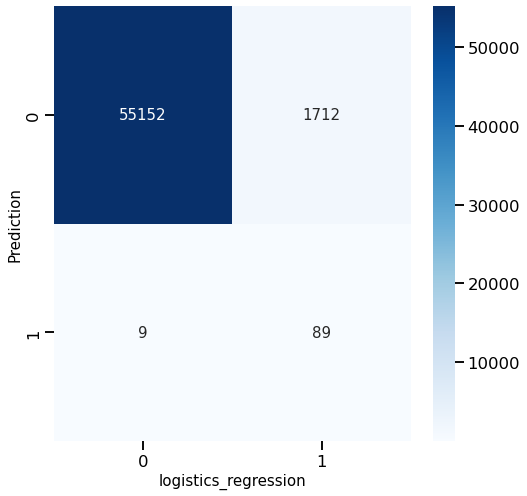

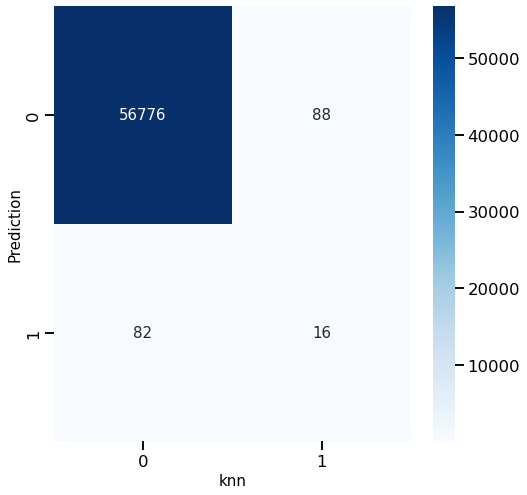

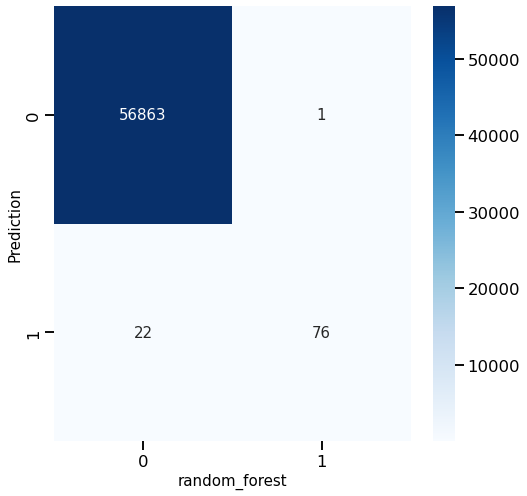

In [27]:
for cols in y_pred_over.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_over[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

In [28]:
# Oversampling does a better job at predicting fraud,
# LR predicts 89 out of 98 cases, KNN 16 and RF 76. However,due to oversampling,
# many of the non fraud cases are also marked as fraud by this model which is its biggest disadvantage

### Balance the data through Undersampling of majority class

In [29]:
# This can be done through RandomUnderSampler. This will decrease the majority class, 
# only problem is that the evidence to majority data decreases immensely. Let's see how good the model is with undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_under, y_under = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % (y_under.value_counts()))

Resampled dataset shape 0    394
1    394
Name: Class, dtype: int64


In [31]:
lr_under = LogisticRegression(solver='liblinear').fit(X_under, y_under)
knn_under = KNeighborsClassifier( weights='distance').fit(X_under, y_under)
RF_under = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_under, y_under)

y_pred_under = list()
y_prob_under = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_under, knn_under, RF_under]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_under.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_under.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_under = pd.concat(y_pred_under, axis=1)
y_prob_under = pd.concat(y_prob_under, axis=1)

C:\Users\derek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


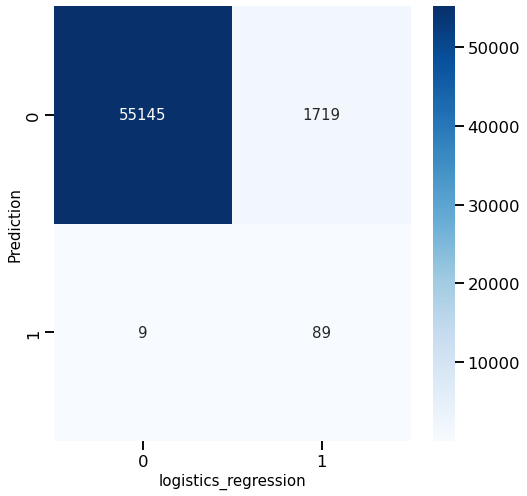

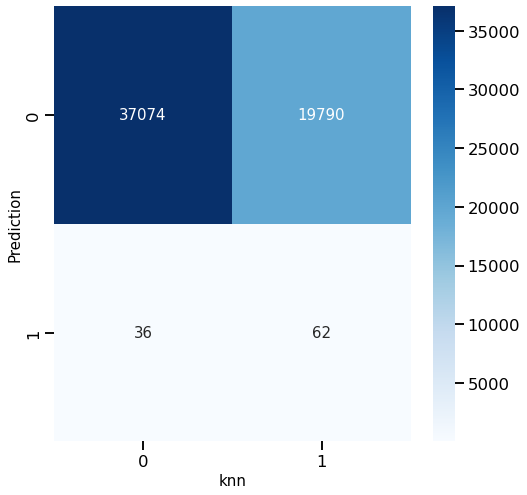

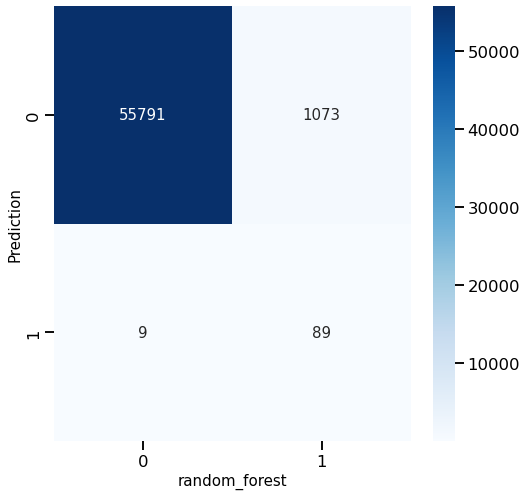

In [32]:
for cols in y_pred_under.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_under[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

In [33]:
# This is a good model to detect fraud, but a bad model overall due to less evidence.
# Again, we see many cases where it wasnt a fraud but this model predicted so.

### APPLY SMOTE

In [34]:
# Synthetic Minority Oversampling Technique, or SMOTE is the technique of synthesizing new examples
# from the minority class. This is different from oversampling as it adds new information. It takes
# on the examples that are close in the feature space, drawing a line between the examples in the feature
# space and drawing a new sample at a point along that line. Learn more about SMOTE from here:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [36]:
y_smote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [37]:
lr_smote = LogisticRegression(solver='liblinear').fit(X_smote, y_smote)
knn_smote = KNeighborsClassifier( weights='distance').fit(X_smote, y_smote)
RF_smote = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_smote, y_smote)

y_pred_smote = list()
y_prob_smote = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_smote, knn_smote, RF_smote]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_smote.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_smote.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_smote = pd.concat(y_pred_smote, axis=1)
y_prob_smote = pd.concat(y_prob_smote, axis=1)

C:\Users\derek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


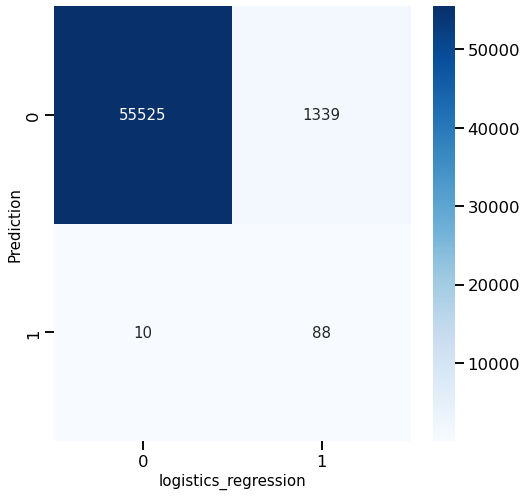

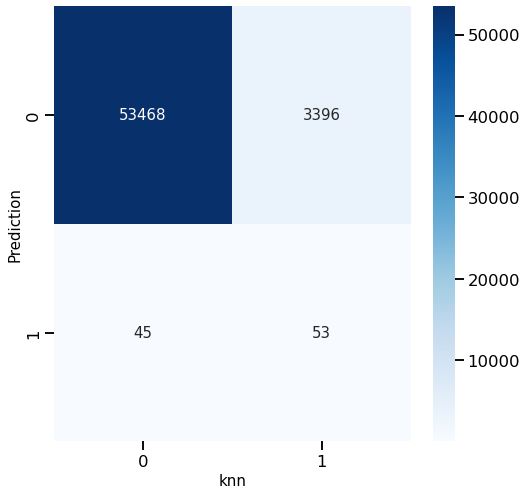

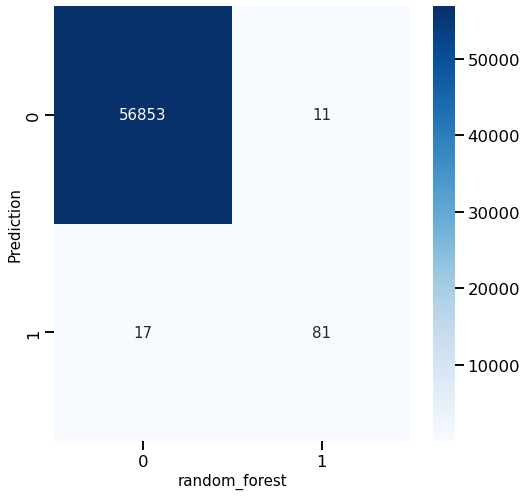

In [38]:
for cols in y_pred_smote.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_smote[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

In [39]:
# Except for random forest, SMOTE again incorrectly detects many non fraud cases as one.
# It's because many of the examples are synthesized and can present a weaker model.While
# generating synthetic examples, SMOTE does not take into consideration neighboring examples
# can be from other classes. This can increase the overlapping of classes and can introduce
# additional noise. One way to resolve this is by making a model with SMOTE + undersampling approach.

### SMOTE + undersampling approach

In [40]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_smote_under, y_smote_under = pipeline.fit_resample(X_train, y_train)

In [41]:
y_smote_under.value_counts()

0    227450
1     22745
Name: Class, dtype: int64

In [42]:
lr_smote_under = LogisticRegression(solver='liblinear').fit(X_smote_under, y_smote_under)
knn_smote_under = KNeighborsClassifier( weights='distance').fit(X_smote_under, y_smote_under)
RF_smote_under = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1).fit(X_smote_under, y_smote_under)

y_pred_smote_under = list()
y_prob_smote_under = list()

coeff_labels = ['logistics_regression', 'knn', 'random_forest']
coeff_models= [lr_smote_under, knn_smote_under, RF_smote_under]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_smote_under.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_smote_under.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_smote_under = pd.concat(y_pred_smote_under, axis=1)
y_prob_smote_under = pd.concat(y_prob_smote_under, axis=1)

C:\Users\derek\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


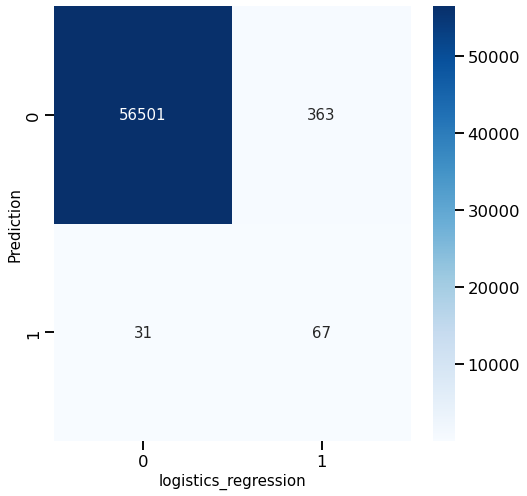

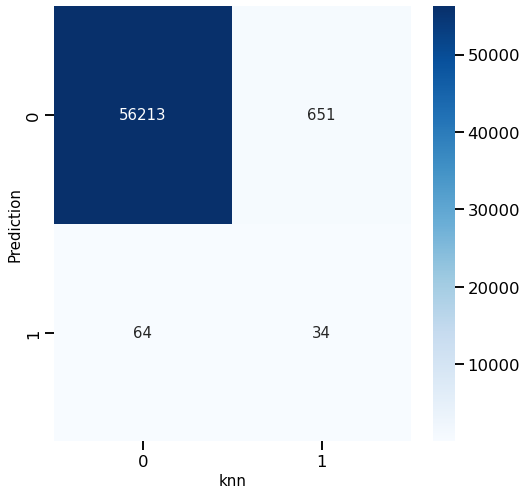

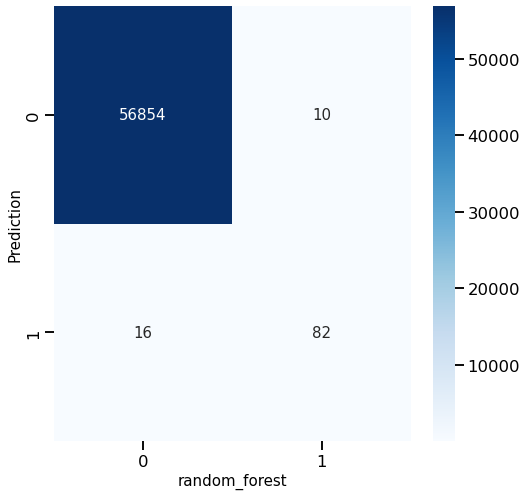

In [43]:
for cols in y_pred_smote_under.columns:
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_smote_under[cols]), annot=True, fmt='d', annot_kws={"size": 15}, cmap = 'Blues')  
    #ax.set_xticklabels(labels, fontsize=15);
    #ax.set_yticklabels(labels[::-1], fontsize=15);
    ax.set_ylabel('Prediction', fontsize=15);
    ax.set_xlabel(cols, fontsize=15)

In [44]:
# As we can see, undersampling has improved the model but the sample strategies can be tuned
# to find the best model with least RECALL

In [45]:
predictions = [y_pred, y_pred_over, y_pred_under, y_pred_smote, y_pred_smote_under]

scores = list()

for i in predictions:
    scores.append(score(y_test, i[lab], average='weighted'))

In [46]:
scores

[(0.9996094058001932, 0.9996137776061234, 0.99959186710614, None),
 (0.9995915767419721, 0.9995962220427653, 0.9995720326374704, None),
 (0.9982503144410865, 0.9810048804466135, 0.9889353469814791, None),
 (0.9994958815045105, 0.9995084442259752, 0.999500695784949, None),
 (0.9995321357070933, 0.9995435553526912, 0.9995363603717383, None)]